In [1]:
#PDAS ALGORITHM FROM SCRATCH (USED SCKIT FEM FOR FEM FORMULATIONS)

In [2]:
import skfem as sk
import numpy as np
from skfem.helpers import dot, grad

In [3]:
N=100
mesh = sk.MeshLine(np.linspace(-1, 1, N + 1))
element = sk.ElementLineP1()
basis = sk.Basis(mesh, element)

In [4]:
# just for plotting examples i am using this syntax can be modifed for polynominal case
a_const = 1.0
b_const = 0.0
c_const = 0.0
f_const = -10.0

In [5]:
@sk.BilinearForm
def bilinf(u, v, w):
    return a_const * dot(grad(u), grad(v)) + b_const * dot(grad(u), v) + c_const * u * v

@sk.LinearForm
def linf(v, w):
    return f_const * v

In [6]:
A = sk.asm(bilinf, basis)
b = sk.asm(linf, basis)

In [7]:
A_bc = A[1:-1, 1:-1]
b_bc = b[1:-1]


In [8]:
import numpy as np
A = A_bc.toarray() 


In [9]:
b =np.array(b_bc)


In [10]:
domain=[]    
for i in range(1,N):
    domain.append(-1+(2*i)/N)
domain=np.array(domain)



In [11]:
import sympy as sp
domain2 = np.concatenate(([-1], domain, [1]))


In [12]:
#define your obstacle accordingly
def phi(x):
    #return 1-2*(x**2)
    #return np.sin(10*x)-np.sin(10)
    #return -np.sin(5*np.pi*(x+1)/2)
    return np.where((x > -0.5) & (x < 0.5), 3, -0.5)
phi_x=phi(domain)


In [13]:
u=np.zeros((N-1))
lamda=np.zeros((N-1))


In [14]:
def check(u,lamda):
    c=1
    result=lamda+c*(phi_x-u)
    Ak=[]
    Ik=[]
    for i in range(N-1):
        if(result[i]>0):
            Ak.append(i)
        if(result[i]<=0):
            Ik.append(i)
    Ak=np.array(Ak)
    Ik=np.array(Ik)  
     
    return Ak,Ik,result

In [15]:
#Algorithm
Ak,Ik,result=check(u,lamda)
print(Ak,Ik,result)
I = np.eye(N-1)
if(len(Ak)>0):
    u[Ak]=phi_x[Ak]
    A_AkAk = A[np.ix_(Ak, Ak)]
    I_AkAk = I[np.ix_(Ak, Ak)]
    b_Ak= b[Ak]
    u_Ak=phi_x[Ak]
if(len(Ak)==0):
    A_AkAk=np.zeros((len(Ak), len(Ak)))
    I_AkAk=np.zeros((len(Ak), len(Ak)))
    b_Ak=np.zeros(len(Ak))
    u_Ak=np.zeros(len(Ak)) 
if(len(Ik)>0):
    lamda[Ik]=0
    A_IkIk = A[np.ix_(Ik, Ik)]
    I_IkIk = I[np.ix_(Ik, Ik)]
    b_Ik=b[Ik] 
if(len(Ik)==0):
    A_IkIk=np.zeros((len(Ik), len(Ik)))
    I_IkIk=np.zeros((len(Ik), len(Ik)))
    b_Ik=np.zeros(len(Ik))
if(len(Ak)>0 and len(Ik)>0):
    A_AkIk = A[np.ix_(Ak, Ik)]
    A_IkAk = A[np.ix_(Ik, Ak)]
    I_AkIk = I[np.ix_(Ak, Ik)]
    I_IkAk = I[np.ix_(Ik, Ak)]
else:
    A_AkIk = np.zeros((len(Ak), len(Ik)))
    A_IkAk = np.zeros((len(Ik), len(Ak)))
    I_AkIk = np.zeros((len(Ak), len(Ik)))
    I_IkAk = np.zeros((len(Ik), len(Ak)))
M = np.block([
    [A_AkIk, -I_AkAk],
    [A_IkIk, -I_IkAk]
])
N1 = np.block([
    [b_Ak-A_AkAk@u_Ak,b_Ik-A_IkAk@u_Ak],
])

N1=N1.T

x=np.linalg.solve(M,N1)
x=x.reshape(-1)
if(len(Ik)>0):
    u[Ik]=x[:len(Ik)]
if(len(Ak)>0):
    lamda[Ak]=x[len(Ik):]

    
    
    

[25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98] [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5
 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5  3.   3.   3.
  3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.
  3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.
  3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.
  3.   3.   3.   3.  -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5
 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5
 -0.5]


In [16]:
count=1
while(True):
    Ak_new,Ik_new,result=check(u,lamda)
    if(set(Ak_new)==set(Ak)):
        print(Ak_new)
        print(count)
        break
    
    else:
        print(Ik_new) 
        if(len(Ak_new)>0):
            u[Ak_new]=phi_x[Ak_new]
            A_AkAk = A[np.ix_(Ak_new, Ak_new)]
            I_AkAk = I[np.ix_(Ak_new, Ak_new)]
            b_Ak= b[Ak_new]
            u_Ak=phi_x[Ak_new]
        if(len(Ak_new)==0):
            A_AkAk=np.zeros((len(Ak_new), len(Ak_new)))
            I_AkAk=np.zeros((len(Ak_new), len(Ak_new)))
            b_Ak=np.zeros(len(Ak_new))
            u_Ak=np.zeros(len(Ak_new)) 
        if(len(Ik_new)>0):
            lamda[Ik_new]=0
            A_IkIk = A[np.ix_(Ik_new, Ik_new)]
            I_IkIk = I[np.ix_(Ik_new, Ik_new)]
            b_Ik=b[Ik_new] 
        if(len(Ik_new)==0):
            A_IkIk=np.zeros((len(Ik_new), len(Ik_new)))
            I_IkIk=np.zeros((len(Ik_new), len(Ik_new)))
            b_Ik=np.zeros(len(Ik_new))
        if(len(Ak_new)>0 and len(Ik_new)>0):
            A_AkIk = A[np.ix_(Ak_new, Ik_new)]
            A_IkAk = A[np.ix_(Ik_new, Ak_new)]
            I_AkIk = I[np.ix_(Ak_new, Ik_new)]
            I_IkAk = I[np.ix_(Ik_new, Ak_new)]
        else:
            A_AkIk = np.zeros((len(Ak_new), len(Ik_new)))
            A_IkAk = np.zeros((len(Ik_new), len(Ak_new)))
            I_AkIk = np.zeros((len(Ak_new), len(Ik_new)))
            I_IkAk = np.zeros((len(Ik_new), len(Ak_new)))
        M = np.block([
            [A_AkIk, -I_AkAk],
            [A_IkIk, -I_IkAk]
        ])
        N1 = np.block([
            [b_Ak-A_AkAk@u_Ak,b_Ik-A_IkAk@u_Ak],
        ])
        N1=N1.T
        x=np.linalg.solve(M,N1)
        x=x.reshape(-1)
        if(len(Ik_new)>0):
            u[Ik_new]=x[:len(Ik_new)]
        if(len(Ak_new)>0):
            lamda[Ak_new]=x[len(Ik_new):]
        count=count+1
        Ak=Ak_new
        Ik=Ik_new
        
        
    

[25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73]
1


In [17]:
import sympy as sp
domain2 = np.concatenate(([-1], domain, [1]))


In [18]:
x=sp.Symbol("x")
function=[]
for i in range(N-1):
    expr=[]
    for j in range(N):
        if(i==j):
            f1=(x-domain2[i])/(domain2[i+1]-domain2[i])
            expr.append(f1)
        elif(j==(i+1)):
            f2=(domain2[i+2]-x)/(domain2[i+2]-domain2[i+1])
            expr.append(f2)
        else:
            expr.append(0)
    function.append(expr)


In [19]:
for i in range(N-1):
    for j in range(N):
        function[i][j]=function[i][j]*u[i]

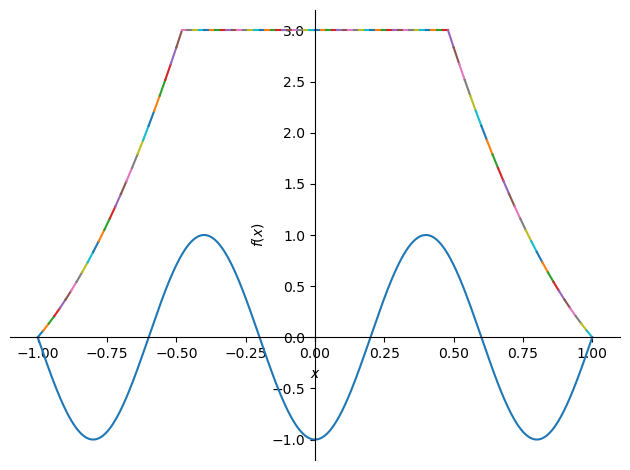

In [20]:
#plot your obstacle accordingly
x=sp.Symbol("x")
plotarg=[]
for i in range(N-1):
    for j in range(N):
        if(i==j==0):
            plotarg.append((function[0][0],(x,-1,-1+2/N)))
        elif(i==N-2 and j==N-1):
            plotarg.append((function[i][j],(x,-1+(2*(N-1))/N,1)))
        elif(i==j!=0):
            plotarg.append((function[i-1][j]+function[i][j],(x,-1+(2*j)/N,-1+(2*(j+1))/N)))
#plotarg.append((1-2*(x**2),(x,-1,1)))
#plotarg.append((sp.sin(10*x)-sp.sin(10),(x,-1,1)))
plotarg.append((-sp.sin(5*sp.pi*(x+1)/2),(x,-1,1)))
#plotarg.append((3,(x,0.5,-0.5)))
#plotarg.append((-0.5,(x,-1,-0.5)))
#plotarg.append((-0.5,(x,0.5,1)))
p = sp.plot(*plotarg, show=False)
p.show() 